<a href="https://colab.research.google.com/github/Jatin24505/Capegemini-Training/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")

In [114]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [115]:
df.shape

(400, 5)

In [116]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [118]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [121]:
df.dtypes


,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [122]:
df.nunique()

,0
User ID,400
Gender,2
Age,43
EstimatedSalary,117
Purchased,2


In [123]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [124]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [125]:
#i want female as 1 and male as 0

#df['Gender']=np.where(df['Gender']== "Female",1,0)

In [126]:
df.nunique()

,0
User ID,400
Gender,2
Age,43
EstimatedSalary,117
Purchased,2


In [127]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


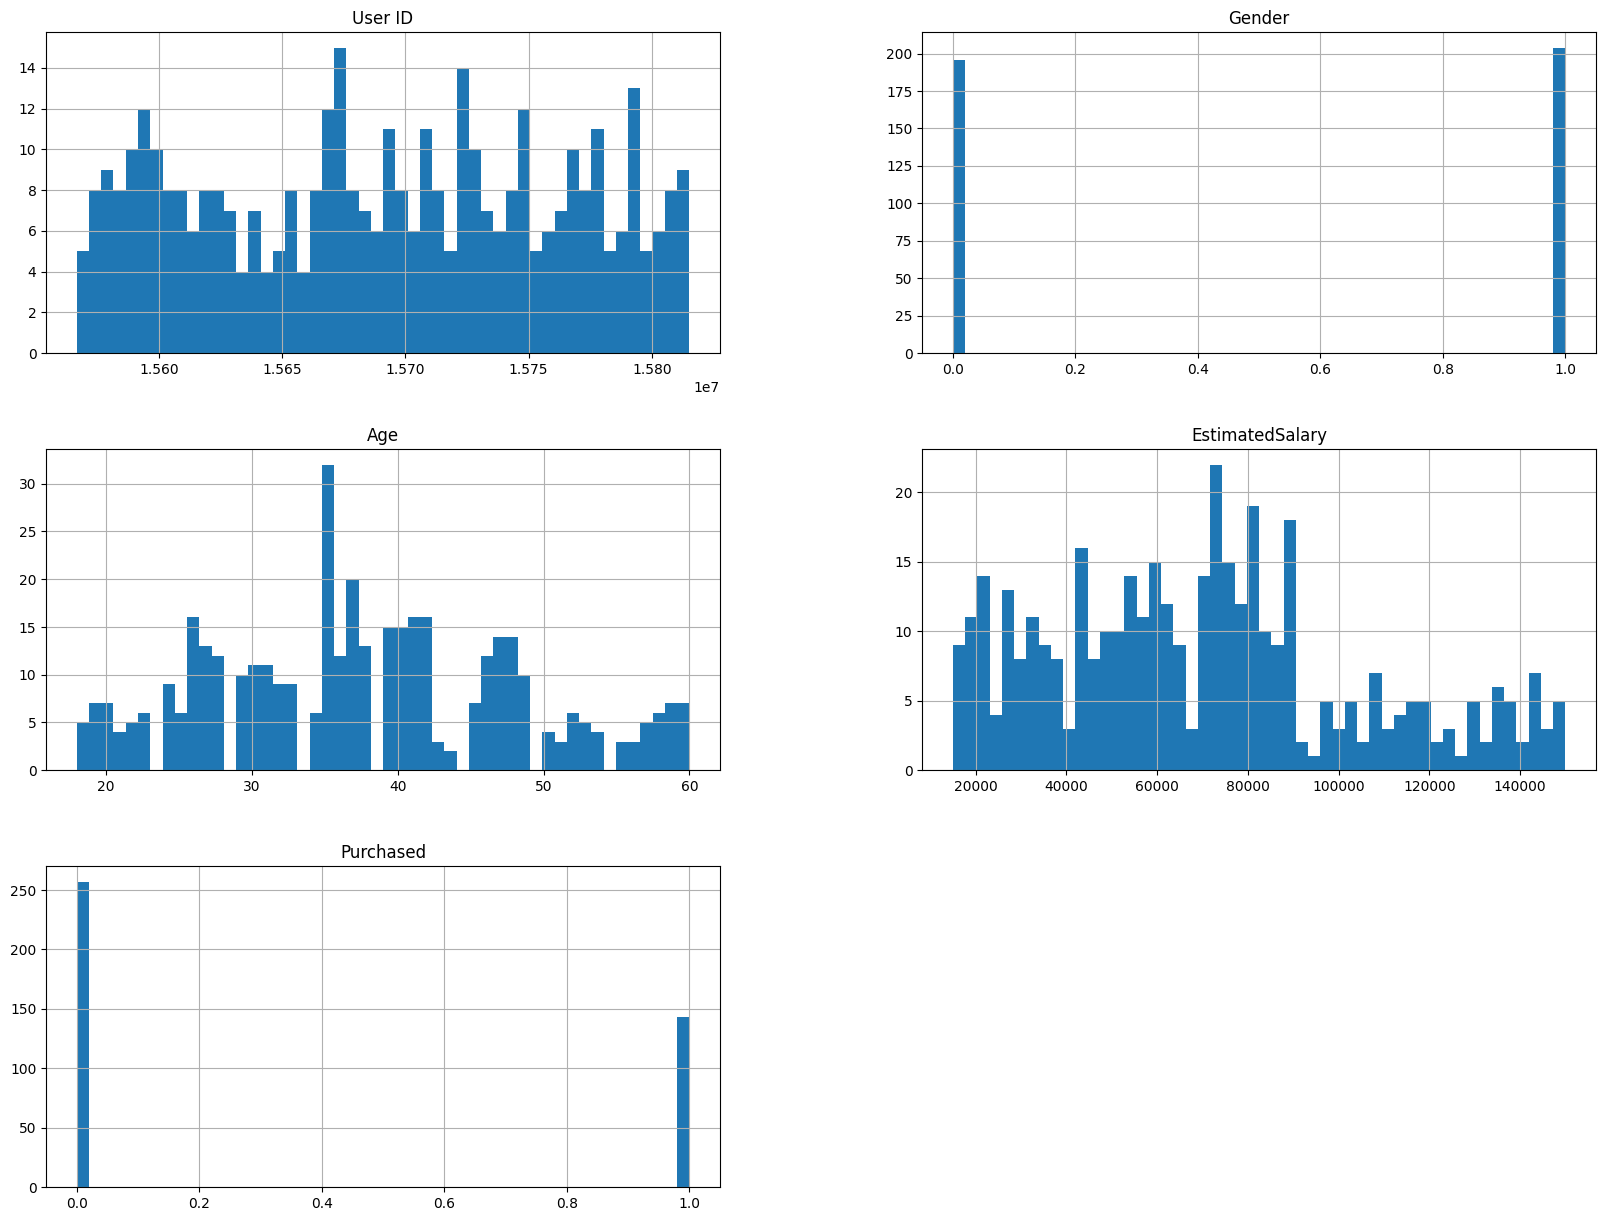

In [128]:
#graphs
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=50,figsize=(20,15))
plt.show()

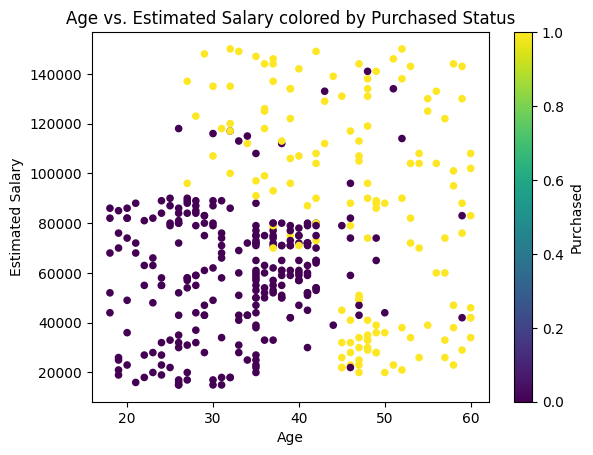

In [129]:
df.plot(kind="scatter",x="Age",y="EstimatedSalary", c='Purchased', cmap='viridis')
plt.title('Age vs. Estimated Salary colored by Purchased Status')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

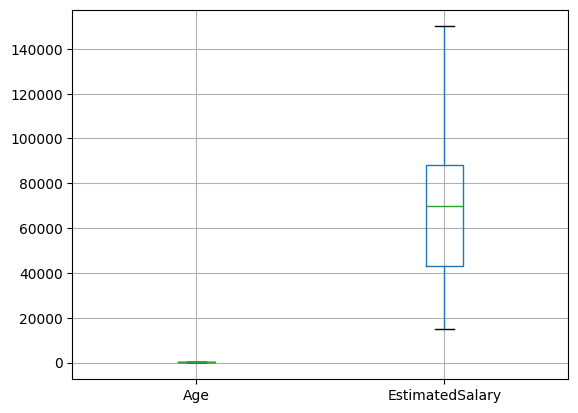

In [130]:
df.boxplot(column=["Age","EstimatedSalary"])
plt.show()

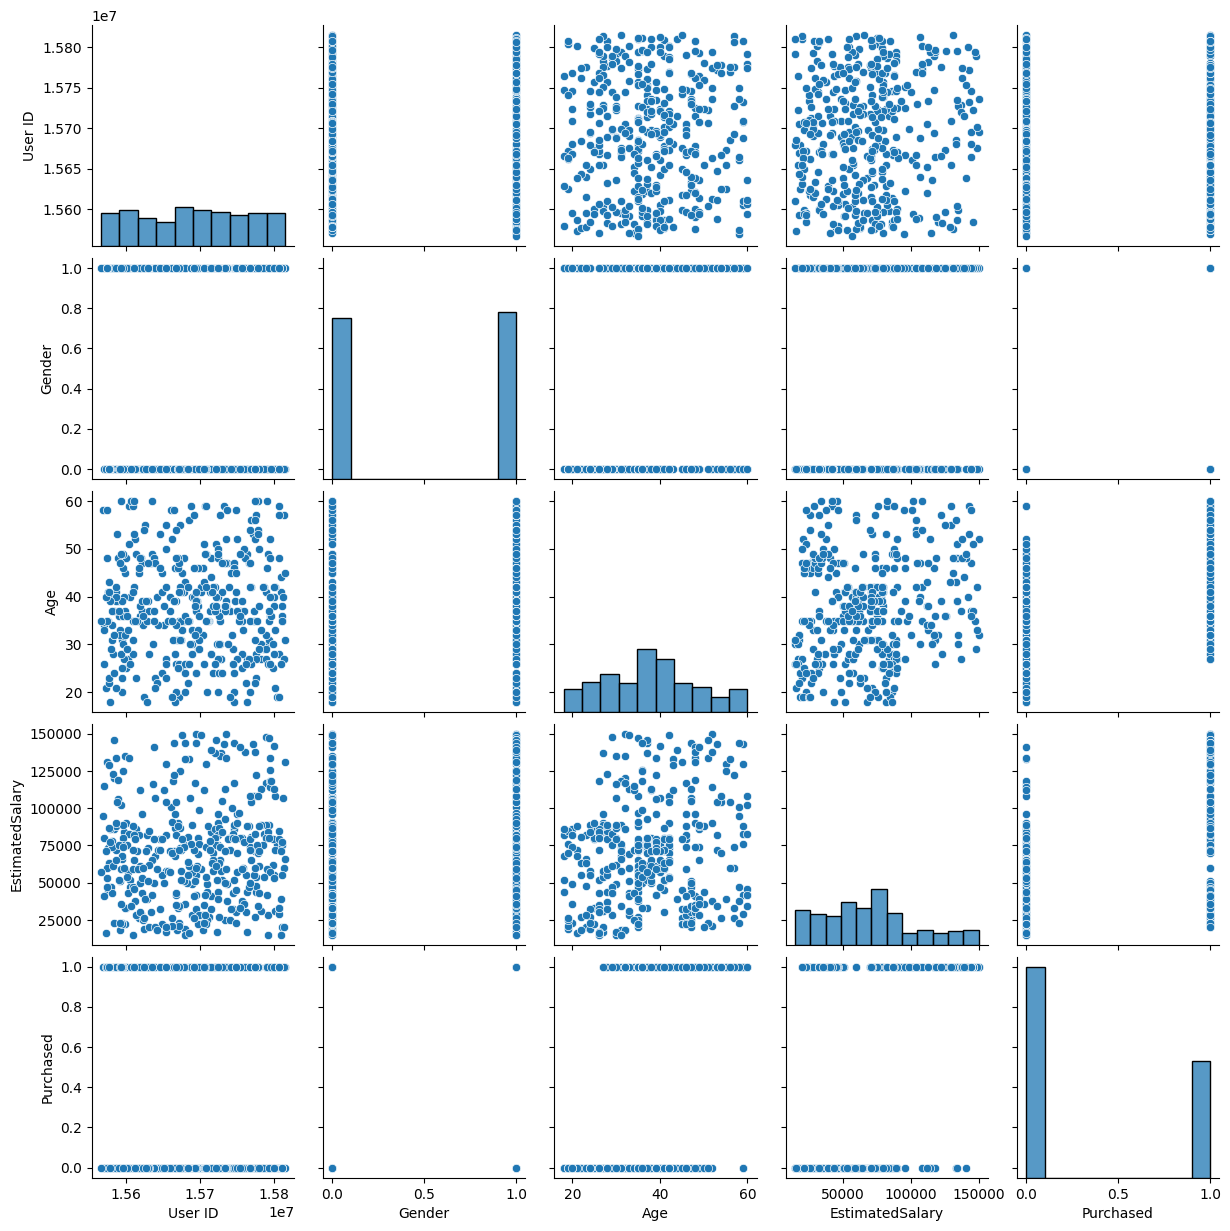

In [131]:
sns.pairplot(df)
plt.show()

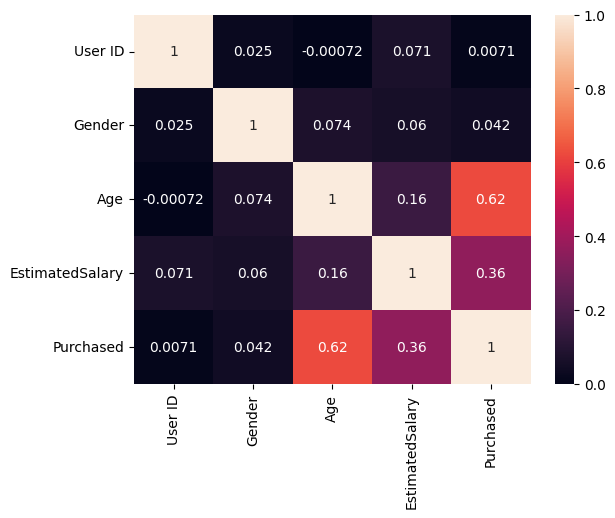

In [132]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [133]:
#create a fun for boxplot
def boxplot(column):
  sns.boxplot(x=df[column])
  plt.show()

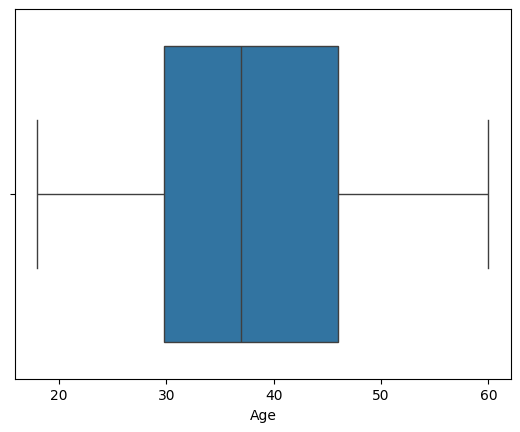

In [134]:
boxplot("Age")

In [135]:
#CREATE A FUNCTION FOR DISTRIBUTION
def distribution(column):
  sns.distplot(df[column])
  plt.show()

### Value Counts for Categorical Features
Let's check the distribution of categories in the 'Gender' and 'Purchased' columns.

In [136]:
print("Gender Value Counts:")
display(df['Gender'].value_counts())
print("\nPurchased Value Counts:")
display(df['Purchased'].value_counts())

Gender Value Counts:


,count
Gender,
1,204
0,196



Purchased Value Counts:


,count
Purchased,
0,257
1,143


### Outlier Detection using IQR Method
We can identify potential outliers in numerical columns like 'Age' and 'EstimatedSalary' using the Interquartile Range (IQR) method. Values falling outside the range of `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR` are considered outliers.

In [137]:
# Calculate Q1, Q3, and IQR for numerical columns
Q1 = df[['Age', 'EstimatedSalary']].quantile(0.25)
Q3 = df[['Age', 'EstimatedSalary']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bounds for Outliers:")
display(lower_bound)
print("\nUpper Bounds for Outliers:")
display(upper_bound)

# Identify outliers
outliers_age = df[(df['Age'] < lower_bound['Age']) | (df['Age'] > upper_bound['Age'])]
outliers_salary = df[(df['EstimatedSalary'] < lower_bound['EstimatedSalary']) | (df['EstimatedSalary'] > upper_bound['EstimatedSalary'])]

print("\nPotential Outliers in Age:")
display(outliers_age)
print("\nPotential Outliers in EstimatedSalary:")
display(outliers_salary)

Lower Bounds for Outliers:


,0
Age,5.375
EstimatedSalary,-24500.000



Upper Bounds for Outliers:


,0
Age,70.375
EstimatedSalary,155500.000



Potential Outliers in Age:


,User ID,Gender,Age,EstimatedSalary,Purchased



Potential Outliers in EstimatedSalary:


,User ID,Gender,Age,EstimatedSalary,Purchased


/tmp/ipython-input-1805573733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


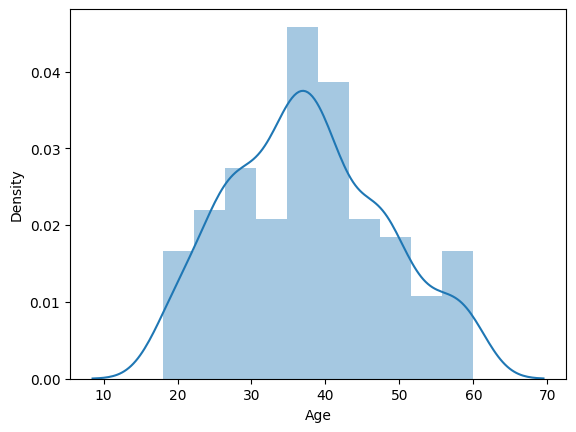

In [138]:
  distribution("Age")

In [139]:
name = input("Enter your Name: ")
age = input("Enter your Age: ")
grade = input("Enter your Grade/Class: ")
favourite_color = input("Enter your Favourite Color: ")
print(f"Name            : {name}")
print(f"Age             : {age}")
print(f"Grade/Class     : {grade}")
print(f"Favourite Color : {favourite_color}")


Enter your Name: j
Enter your Age: 23
Enter your Grade/Class: mca
Enter your Favourite Color: r
Name            : j
Age             : 23
Grade/Class     : mca
Favourite Color : r


In [140]:
import ipywidgets as widgets
from IPython.display import display

In [141]:


# Name input
name = widgets.Text(
    value='',
    placeholder='Enter your name',
    description='Name:',
    disabled=False
)

# Age input (only integers)
age = widgets.IntText(
    value=5,
    description='Age:',
    disabled=False
)

# Grade dropdown
grade = widgets.Dropdown(
    options=['Kinder', 'Class 1', 'Class 2', 'Class 3'],
    value='Kinder',
    description='Grade:',
)

# Favourite color picker
fav_color = widgets.ColorPicker(
    description='Fav Color:',
    value='red'
)

# Submit button
submit_button = widgets.Button(
    description='Submit Form',
    button_style='success'
)

# Output area
output = widgets.Output()

# -------- Handle Submit Button --------
def on_submit(b):
    with output:
        output.clear_output()
        print("--- Student Info Form ---")
        print(f"Name            : {name.value}")
        print(f"Age             : {age.value}")
        print(f"Grade/Class     : {grade.value}")
        print(f"Favourite Color : {fav_color.value}")

# Link button to function
submit_button.on_click(on_submit)

# -------- Display Form --------
display(name, age, grade, fav_color, submit_button, output)


Text(value='', description='Name:', placeholder='Enter your name')

IntText(value=5, description='Age:')

Dropdown(description='Grade:', options=('Kinder', 'Class 1', 'Class 2', 'Class 3'), value='Kinder')

ColorPicker(value='red', description='Fav Color:')

Button(button_style='success', description='Submit Form', style=ButtonStyle())

Output()